Chapter 31
# 从几何角度理解PCA
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
# pip install pandas_datareader
import seaborn as sns

In [2]:
# 下载数据
df = pdr.data.DataReader(['DGS6MO','DGS1'], data_source='fred', start='01-01-2022', end='12-31-2022')
df.to_csv('IR_data.csv')
# 如果不能下载数据，请用pandas.read_csv() 读入配套数据
df = df.dropna()

In [3]:
# 修改列标签
df = df.rename(columns={'DGS6MO': 'X1', 'DGS1': 'X2'})
df.head()

,X1,X2
DATE,,
2022-01-03,0.22,0.40
2022-01-04,0.22,0.38
2022-01-05,0.22,0.41
2022-01-06,0.23,0.45
2022-01-07,0.24,0.43


In [4]:
X_df = df.pct_change(); 
# 计算日收益率
X_df = X_df.dropna()

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)
X_scaled

array([[-3.05271311e-01, -1.54857077e+00],
       [-3.05271311e-01,  1.73886783e+00],
       [ 7.32593773e-01,  2.21341098e+00],
       [ 6.87469204e-01, -1.40693509e+00],
       [ 3.50023400e+00,  1.50483091e+00],
       [-3.05271311e-01, -2.73849682e-01],
       [-1.12073673e+00,  8.34603439e-01],
       [ 5.40396535e-01, -8.04983469e-01],
       [ 1.32565953e+00,  1.89588834e+00],
       [ 5.02243612e+00,  3.22538468e+00],
       [-9.22380279e-01, -7.13408678e-01],
       [-3.05271311e-01,  1.06796199e+00],
       [-9.39522195e-01, -1.12366374e+00],
       [ 2.30421804e+00, -2.73849682e-01],
       [-3.05271311e-01,  2.80306329e+00],
       [ 2.80191044e-01,  1.68725969e+00],
       [ 1.40720608e+00,  1.54718045e+00],
       [-3.05271311e-01, -2.73849682e-01],
       [ 2.88073313e+00,  7.45927189e-01],
       [-7.71251552e-01, -2.73849682e-01],
       [-1.73233580e+00, -9.27552805e-01],
       [ 1.21693081e+00,  3.97056154e-01],
       [ 3.50023400e+00,  3.32151749e+00],
       [ 5.

In [9]:
np.cov(X_scaled.T)

array([[1.00404858, 0.74432704],
       [0.74432704, 1.00404858]])

In [10]:
from sklearn.covariance import EmpiricalCovariance
x1_array = np.linspace(-6,6,601)
x2_array = np.linspace(-6,6,601)
xx1, xx2 = np.meshgrid(x1_array, x2_array)
xx12 = np.c_[xx1.ravel(), xx2.ravel()]

In [17]:
COV = EmpiricalCovariance().fit(X_scaled)
COV.covariance_

array([[1.        , 0.74132572],
       [0.74132572, 1.        ]])

In [18]:
mahal_sq_Xc = COV.mahalanobis(xx12)

In [19]:
mahal_sq_dd = mahal_sq_Xc.reshape(xx1.shape)
mahal_dd = np.sqrt(mahal_sq_dd)

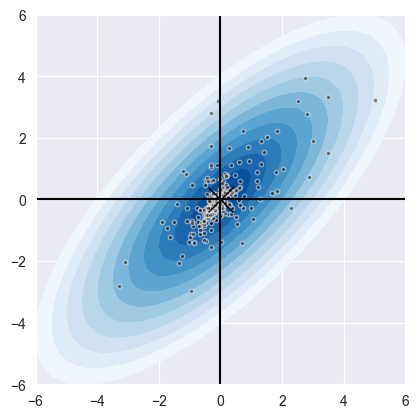

In [26]:
fig, ax = plt.subplots()

plt.contourf(xx1, xx2, mahal_dd, cmap='Blues_r', levels=np.linspace(0,6,13))
plt.scatter(X_scaled[:,0],X_scaled[:,1], s=38, edgecolor='w', alpha=0.5, marker='.', color='k')
plt.plot(X_scaled[:,0].mean(),X_scaled[:,1].mean(), marker='x', color='k', markersize=18)

ax.axvline(x=0, c='k')
ax.axhline(y=0, c='k')
ax.grid('off')
ax.set_aspect('equal', adjustable='box')
ax.set_xbound(lower=-6, upper=6)
ax.set_ybound(lower=-6, upper=6)

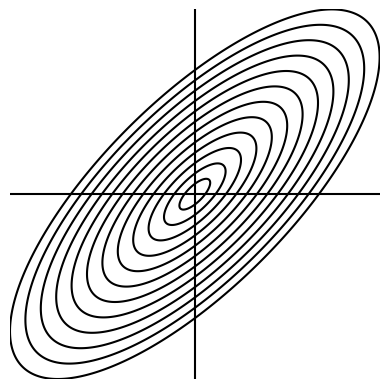

In [27]:
fig, ax = plt.subplots()

plt.contour(xx1, xx2, mahal_dd, colors='k', levels=np.linspace(0,6,13))

ax.axvline(x=0, c='k')
ax.axhline(y=0, c='k')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
ax.set_aspect('equal', adjustable='box')
ax.set_xbound(lower=-6, upper=6)
ax.set_ybound(lower=-6, upper=6)

In [44]:
from sklearn.decomposition import PCA

# 主成分分析
n_components = 2 # 主成分数量
pca = PCA(n_components=n_components)
# 拟合PCA模型
pca.fit(X_scaled)

# 获取loadings（主成分方向向量）
loadings = pca.components_.T
V = loadings
print('v: ', V)
print(np.round(loadings.T @ loadings))
v1 = V[:, [0]] # 第一主成分方向
v2 = V[:, [1]] # 第二主成分方向


v:  [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
[[1. 0.]
 [0. 1.]]


In [35]:
pca.explained_variance_

array([1.74837562, 0.25972155])

In [34]:
pca.explained_variance_ratio_

array([0.87066286, 0.12933714])

In [37]:
# 自定义绘制向量函数
def draw_vector(vector,RBG): 
    array = np.array([[0, 0, vector[0], vector[1]]], dtype=object)
    X, Y, U, V = zip(*array)
    plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color=RBG, zorder=1e5)

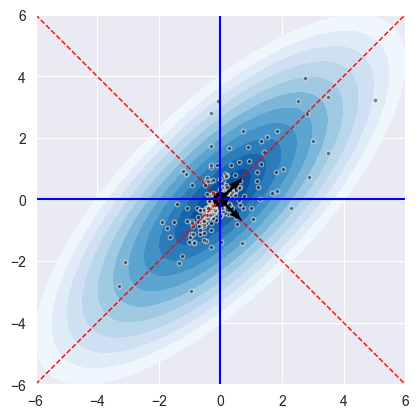

In [48]:
fig, ax = plt.subplots()
# 椭圆面
plt.contourf(xx1, xx2, mahal_dd, cmap='Blues_r', levels=np.linspace(0,6,13))
# 散点图
plt.scatter(X_scaled[:,0], X_scaled[:,1], s=38, edgecolor='w', alpha=0.5, marker='.', color='k')
# 质心
plt.plot(X_scaled[:,0].mean(), X_scaled[:,1].mean(), marker='o', color='k', markersize=10)

# 可视化两个主成分方向
draw_vector(v1, 'k')
draw_vector(v2, 'k')

# 绘制两条参考线
ax.plot(x1_array,x1_array*v1[1]/v1[0], 'r', lw=1.0, ls='dashed')
ax.plot(x1_array,x1_array*v2[1]/v2[0], 'r', lw=1.0, ls='dashed')

ax.axvline(x=0, c='b'); ax.axhline(y=0, c='b')
ax.grid('off')
ax.set_aspect('equal', adjustable='box')
ax.set_xbound(lower=-6, upper=6); ax.set_ybound(lower=-6, upper=6)

In [50]:
# 完成投影
proj1 = v1@v1.T
z1_2D = X_scaled@proj1

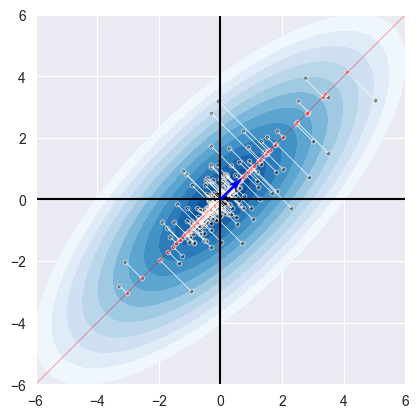

In [56]:
fig, ax = plt.subplots()

plt.contourf(xx1, xx2, mahal_dd, cmap='Blues_r', levels=np.linspace(0,6,13))
plt.scatter(X_scaled[:,0],X_scaled[:,1], s=38, edgecolor='w', alpha=0.5, marker='.', color='k')
plt.plot(X_scaled[:,0].mean(),X_scaled[:,1].mean(), marker='o', color='k', markersize=10)
# 投影后的点
plt.scatter(z1_2D[:,0],z1_2D[:,1], s=38, edgecolor='w', alpha=0.5, marker='.', color='r')

plt.plot(([i for (i,j) in z1_2D], [i for (i,j) in X_scaled]), ([j for (i,j) in z1_2D], [j for (i,j) in X_scaled]), c='w', lw=0.5)

draw_vector(v1,'b')
ax.plot(x1_array,x1_array*v1[1]/v1[0], 'r', lw=0.25)

ax.axvline(x=0, c='k')
ax.axhline(y=0, c='k')
ax.grid('off')
ax.set_aspect('equal', adjustable='box')
ax.set_xbound(lower=-6, upper=6)
ax.set_ybound(lower=-6, upper=6)

In [57]:
# 完成投影
proj2 = v2@v2.T
z2_2D = X_scaled@proj2

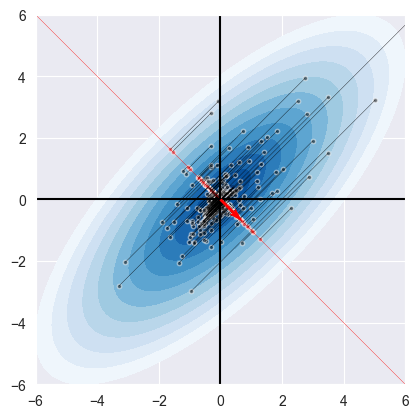

In [59]:
fig, ax = plt.subplots()

plt.contourf(xx1, xx2, mahal_dd, cmap='Blues_r', levels=np.linspace(0,6,13))
plt.scatter(X_scaled[:,0],X_scaled[:,1], s=38, edgecolor='w', alpha=0.5, marker='.', color='k')
plt.plot(X_scaled[:,0].mean(),X_scaled[:,1].mean(), marker='x', color='k', markersize=18)
plt.scatter(z2_2D[:,0],z2_2D[:,1], s=38, edgecolor='w', alpha=0.5, marker='.', color='r')

plt.plot(([i for (i,j) in z2_2D], [i for (i,j) in X_scaled]), ([j for (i,j) in z2_2D], [j for (i,j) in X_scaled]), c='k', lw=0.25)

draw_vector(v2,'r')
ax.plot(x1_array,x1_array*v2[1]/v2[0], 'r', lw = 0.25)

ax.axvline(x=0, c='k')
ax.axhline(y=0, c='k')
ax.grid('off')
ax.set_aspect('equal', adjustable='box')
ax.set_xbound(lower = -6, upper = 6)
ax.set_ybound(lower = -6, upper = 6)

In [62]:
Z = X_scaled @ V
COV = EmpiricalCovariance().fit(Z)

In [23]:
mahal_sq_Xc = COV.mahalanobis(xx12)
mahal_sq_dd = mahal_sq_Xc.reshape(xx1.shape)
mahal_dd = np.sqrt(mahal_sq_dd)

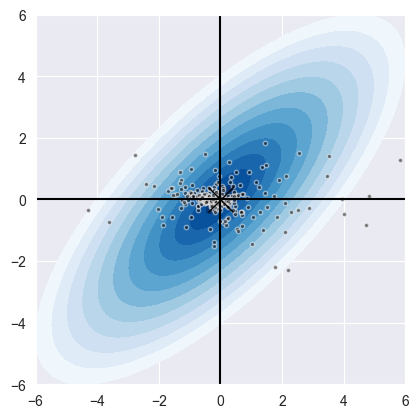

In [61]:
fig, ax = plt.subplots()

plt.contourf(xx1, xx2, mahal_dd, cmap='Blues_r', levels=np.linspace(0,6,13))

plt.scatter(Z[:,0],Z[:,1], s=38, edgecolor='w', alpha=0.5, marker='.', color='k')

plt.plot(X_scaled[:,0].mean(),X_scaled[:,1].mean(), marker='x', color='k', markersize=18)

ax.axvline(x=0, c='k')
ax.axhline(y=0, c='k')
ax.grid('off')
ax.set_aspect('equal', adjustable='box')
ax.set_xbound(lower=-6, upper=6)
ax.set_ybound(lower=-6, upper=6)